# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rasya Radja
- **Email:** rasya.radja12@gmail.com

Proyek Ini Dibuat menggunakan dataset: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana Proporsi Penyewa Casual Dan Registered dalam Total Penyewaan Sepeda
- Pertanyaan 2: Bagaimana pola penggunaan sepeda berdasarkan (cuaca, jam, hari, bulan)?
- Pertanyaan 3: Apakah faktor cuaca mempengaruhi jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
## Import Semua Packages/Library yang Digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

In [ ]:
# Membaca data hour.csv
hours_df= pd.read_csv("data\hour.csv")

In [ ]:
# Menampilkan beberapa 5 baris pertama hours_df
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# Informasi hours_df
print(hours_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [ ]:
# Membaca dataset day.csv
days_df = pd.read_csv("data\day.csv")

In [ ]:
# Menampilkan beberapa 5 baris pertama days_df
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Informasi days_df
print(days_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


**Insight:**
- Dataset berhasil dimuat dengan jumlah 16 kolom untuk *hours.csv* dan 17 kolom untuk *days.csv*
- Terdapat beberapa kolom seperti datetime, season, weather, temp, atemp, humidity, windspeed, casual, registered, dll


### Assessing Data

In [ ]:
# Mengecek missing value dalam tabel days_df
days_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
# Mengecek duplikat data dalam tabel days_df
print("Jumlah duplikat data days_df: ", days_df.duplicated().sum())

Jumlah duplikat data days_df:  0


In [ ]:
# Mengecek missing value dalam tabel hours_df
hours_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
# Mengecek duplikat data dalam tabel hours_df
print("Jumlah duplikat data hours_df: ", hours_df.duplicated().sum())

Jumlah duplikat data hours_df:  0


In [ ]:
# Memeriksa parameter statistik data didalam days_df
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# Memeriksa parameter statistik data didalam hours_df
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada missing values dalam dataset.
- Tidak ada duplikat dalam dataset.
- Kolom 'dteday' perlu dikonversi ke tipe datetime.
- Beberapa kolom seperti 'season' dan 'weather' mungkin perlu diubah menjadi kategorikal.

### Cleaning Data

In [ ]:
# Mengubah tipe data kolom 'dteday' yang berupa object menjadi tipe data 'datetime'
days_df['dteday'] = pd.to_datetime(days_df['dteday'])
hours_df['dteday'] = pd.to_datetime(hours_df['dteday'])

In [ ]:
# Menghapus kolom 'instant' karena tidak memberikan informasi tambahan
days_df = days_df.drop(['instant'], axis=1)
hours_df = hours_df.drop(['instant'], axis=1)

In [ ]:
# Mengubah tipe data int menjadi category pada kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit'
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in columns:
    days_df[column] = days_df[column].astype("category")
    hours_df[column] = hours_df[column].astype("category")

In [ ]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset day_df
days_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count','hum':'humidity'},inplace=True)

In [ ]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset hour_df
hours_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count','hum':'humidity'},inplace=True)

In [ ]:
# Mengubah nilai kategori menjadi label
days_df['season'] = days_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hours_df['season'] = hours_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

days_df['weather_situation'] = days_df['weather_situation'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'})
hours_df['weather_situation'] = hours_df['weather_situation'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'})

days_df['one_of_week'] = days_df['one_of_week'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
hours_df['one_of_week'] = hours_df['one_of_week'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

days_df['month'] = days_df['month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
hours_df['month'] = hours_df['month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

days_df['year'] = days_df['year'].map({0: '2011', 1: '2012'})
hours_df['year'] = hours_df['year'].map({0: '2011', 1: '2012'})

In [ ]:
# Membuat kolom baru bernama category_days yang menunjukan isi kolom tersebut weekend atau weekdays
one_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_days(one_of_week):
    if one_of_week in ["Saturday", "Sunday"]:
        return "weekend"
    else:
        return "weekdays"

hours_df["category_days"] = hours_df["one_of_week"].apply(get_category_days)
days_df["category_days"] = days_df["one_of_week"].apply(get_category_days)

In [ ]:
# Menghitung Humidity
days_df['humidity'] = days_df['humidity']*100
hours_df['humidity'] = hours_df['humidity']*100

# Mengonversi suhu dari nilai ternormalisasi menjadi derajat Celsius
days_df['temp'] = days_df['temp'] * 41
days_df['atemp'] = days_df['atemp'] * 50
hours_df['temp'] = hours_df['temp'] * 41
hours_df['atemp'] = hours_df['atemp'] * 50

# Mengonversi kecepatan angin dari nilai ternormalisasi menjadi kecepatan aslinya
days_df['wind_speed'] = days_df['wind_speed'] * 67
hours_df['wind_speed'] = hours_df['wind_speed'] * 67

In [ ]:
# Memeriksa nilai yang berada di luar rentang yang diharapkan
print("Nilai unik dalam kolom 'season' pada days_df:", days_df['season'].unique())
print("Nilai unik dalam kolom 'weather_situation' pada days_df:", days_df['weather_situation'].unique())

# Verifikasi bahwa nilai telah diganti dengan benar
print(days_df[['season', 'weather_situation', 'one_of_week', 'month']].head())

Nilai unik dalam kolom 'season' pada days_df: ['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Spring', 'Summer', 'Fall', 'Winter']
Nilai unik dalam kolom 'weather_situation' pada days_df: ['Mist', 'Clear', 'Light Snow/Rain']
Categories (3, object): ['Clear', 'Mist', 'Light Snow/Rain']
   season weather_situation one_of_week month
0  Spring              Mist    Saturday   Jan
1  Spring              Mist      Sunday   Jan
2  Spring             Clear      Monday   Jan
3  Spring             Clear     Tuesday   Jan
4  Spring             Clear   Wednesday   Jan


In [ ]:
# Memeriksa nilai yang berada di luar rentang yang diharapkan
print("Nilai unik dalam kolom 'season' pada hours_df:", hours_df['season'].unique())
print("Nilai unik dalam kolom 'weather_situation' pada hours_df:", hours_df['weather_situation'].unique())

# Verifikasi bahwa nilai telah diganti dengan benar
print(hours_df[['season', 'weather_situation', 'one_of_week', 'month']].head())

Nilai unik dalam kolom 'season' pada hours_df: ['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Spring', 'Summer', 'Fall', 'Winter']
Nilai unik dalam kolom 'weather_situation' pada hours_df: ['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow']
Categories (4, object): ['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow']
   season weather_situation one_of_week month
0  Spring             Clear    Saturday   Jan
1  Spring             Clear    Saturday   Jan
2  Spring             Clear    Saturday   Jan
3  Spring             Clear    Saturday   Jan
4  Spring             Clear    Saturday   Jan


In [ ]:
# Mengecek distribusi nilai dalam kolom 'weather_situation' di days_df
print("Distribusi nilai 'weather_situation' dalam days_df:")
print(days_df['weather_situation'].value_counts())



Distribusi nilai 'weather_situation' dalam days_df:
weather_situation
Clear              463
Mist               247
Light Snow/Rain     21
Name: count, dtype: int64


In [ ]:
# Mengecek distribusi nilai dalam kolom 'weather_situation' di hours_df
print("\nDistribusi nilai 'weather_situation' dalam hours_df:")
print(hours_df['weather_situation'].value_counts())


Distribusi nilai 'weather_situation' dalam hours_df:
weather_situation
Clear              11413
Mist                4544
Light Snow/Rain     1419
Heavy Rain/Snow        3
Name: count, dtype: int64


In [ ]:
# Menyimpan data yang sudah dibersihkan ke file baru
days_df.to_csv('data\cleaned_day.csv', index=False)
hours_df.to_csv('data\cleaned_hour.csv', index=False)

In [ ]:
print(hours_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dteday             17379 non-null  datetime64[ns]
 1   season             17379 non-null  category      
 2   year               17379 non-null  object        
 3   month              17379 non-null  category      
 4   hours              17379 non-null  int64         
 5   holiday            17379 non-null  category      
 6   one_of_week        17379 non-null  category      
 7   workingday         17379 non-null  int64         
 8   weather_situation  17379 non-null  category      
 9   temp               17379 non-null  float64       
 10  atemp              17379 non-null  float64       
 11  humidity           17379 non-null  float64       
 12  wind_speed         17379 non-null  float64       
 13  casual             17379 non-null  int64         
 14  regist

**Insight:**
- Data telah dibersihkan dari missing values dan duplikat.
- Tipe data kolom 'dteday' telah diubah menjadi datetime.
- Kolom 'instant' telah dihapus karena tidak memberikan informasi tambahan.
- Kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit' telah diubah menjadi tipe data kategorikal.
-  Nama kolom telah diubah agar lebih mudah dibaca.
- Nilai-nilai kategori pada kolom 'season', 'weather_situation', 'one_of_week', 'month', 'year' telah diubah menjadi label yang lebih deskriptif.
- Kolom 'category_days' telah ditambahkan untuk mengkategorikan hari sebagai 'weekend' atau 'weekdays'.
- Kolom 'humidity' telah diubah menjadi persentase.
- Kolom 'temp' dan 'atemp' telah diubah menjadi derajat Celsius.
- Kolom 'windspeed' telah diubah menjadi kecepatan aslinya.
- Distribusi nilai pada kolom 'weather_situation' telah diperiksa.
- Data yang telah dibersihkan telah disimpan dalam file CSV baru.

## Exploratory Data Analysis (EDA)

### Explore Data Day

In [ ]:
# Melihat rangkuman parameter statistik dari data day_df
days_df.describe(include="all")

,dteday,season,year,month,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count,category_days
count,731,731,731,731,731.0,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,4,2,12,2.0,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Fall,2012,Jan,0.0,Sunday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays
freq,NaN,188,366,62,710.0,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN


In [ ]:
# Melihat jumlah penyewaan per musim
season_grouped = days_df.groupby(by="season", observed=False).agg({
    "count":["sum"]
}).reset_index()

season_grouped.columns = ['season', 'count_sum']

print(season_grouped.sort_values(by='count_sum', ascending = False))

   season  count_sum
2    Fall    1061129
1  Summer     918589
3  Winter     841613
0  Spring     471348


In [ ]:
# Melihat jumlah penyewaan tiap tahun berdasarkan registered dan casual
days_df.groupby(by="dteday").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

days_df.groupby(by="dteday").agg({
    "count":["sum"]
})

,count
,sum
dteday,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095


In [ ]:
# Melihat distribusi penyewaan sepeda berdasarkan hari dalam seminggu
day_of_week_grouped = days_df.groupby(by="one_of_week", observed=False).agg({
    "count": ["sum"]
}).reset_index()

day_of_week_grouped.columns = ['one_of_week', 'count_sum']

# Menampilkan hasil
print(day_of_week_grouped.sort_values(by='count_sum', ascending=False))

  one_of_week  count_sum
5      Friday     487790
4    Thursday     485395
6    Saturday     477807
3   Wednesday     473048
2     Tuesday     469109
1      Monday     455503
0      Sunday     444027


In [ ]:
# Melihat distribusi penyewaan sepeda berdasarkan Weekend dan Weekdays
days_grouped = days_df.groupby('category_days').agg({
    "count" : ["sum"]
}).reset_index()

days_grouped.columns = ['category_days', 'count_sum']

# Menampilkan hasil
print(days_grouped.sort_values(by='count_sum', ascending=False))

  category_days  count_sum
0      weekdays    2370845
1       weekend     921834


In [ ]:
# Melihat jumlah penyewaan sepeda berdasarkan hari
days_df.groupby('dteday').agg({
    'count':['sum']
})

,count
,sum
dteday,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095


### Explore Data Hour

In [ ]:
# Melihat rangkuman parameter statistik dari data hours_df
hours_df.describe(include = "all")

,dteday,season,year,month,hours,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count,category_days
count,17379,17379,17379,17379,17379.000000,17379.0,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,4,2,12,NaN,2.0,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Fall,2012,May,NaN,0.0,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays
freq,NaN,4496,8734,1488,NaN,16879.0,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN


In [ ]:
# Distribusi penyewaan sepeda berdasarkan cuaca
weather_grouped = hours_df.groupby('weather_situation', observed=False).agg({
    "count":["sum"]
}).reset_index()

weather_grouped.columns = ['weather_situation', 'count_sum']

print(weather_grouped.sort_values(by='count_sum', ascending=False))

  weather_situation  count_sum
0             Clear    2338173
1              Mist     795952
2   Light Snow/Rain     158331
3   Heavy Rain/Snow        223


In [ ]:
# Melihat distribusi penyewaan berdasarkan jam yang paling sering disewa(dataset hour_df)
hourly_counts = hours_df.groupby('hours')['count'].sum().reset_index()
hourly_counts.columns = ['hours', 'count_sum']

hourly_counts = hourly_counts.sort_values(by='count_sum', ascending=False)

print(hourly_counts.to_string(index=False))

 hours  count_sum
    17     336860
    18     309772
     8     261001
    16     227748
    19     226789
    13     184919
    12     184414
    15     183149
    14     175652
    20     164550
     9     159438
     7     154171
    11     151320
    10     126257
    21     125445
    22      95612
    23      63941
     6      55132
     0      39130
     1      24164
     2      16352
     5      14261
     3       8174
     4       4428


In [ ]:
# Melihat distribusi penyewaan ascending berdasarkan jam dimulai dari 0-23
hours_df.groupby(by="hours").agg({
     "count": ["sum"]
 })

,count
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


**Insight:**

Data Day:
 - Musim panas (Summer) memiliki jumlah penyewaan sepeda terbanyak,
   diikuti oleh musim gugur (Fall) dan musim semi (Spring).
 - Jumlah penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan
   dengan akhir pekan.
 - Terlihat pola fluktuasi jumlah penyewaan sepeda secara harian,
   dengan beberapa hari tertentu yang mengalami lonjakan penyewaan.


Data Hour:
- Cuaca cerah (Clear) memiliki jumlah penyewaan sepeda terbanyak,
   diikuti oleh cuaca berkabut (Mist) dan cuaca dengan salju/hujan ringan
   (Light Snow/Rain).
 - Jam-jam sibuk untuk penyewaan sepeda adalah sekitar jam 17:00 (5PM)
   dan 8:00 (8AM).
 - Pola penyewaan sepeda berdasarkan jam menunjukkan adanya puncak
   penyewaan pada pagi dan sore hari, yang mengindikasikan
   penggunaan sepeda untuk perjalanan berangkat dan pulang kerja.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Proporsi Penyewa Casual Dan Registered dalam Total Penyewaan Sepeda

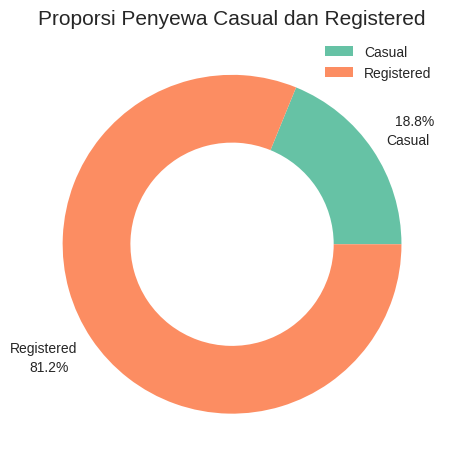

In [ ]:
plt.pie(
    hours_df[["casual", "registered"]].sum(),
    autopct="%1.1f%%",
    labels=["Casual", "Registered"],
    wedgeprops={"width": 0.4},
    pctdistance=1.3,
    colors=sns.color_palette('Set2'),
)
plt.title("Proporsi Penyewa Casual dan Registered", fontsize=15)
plt.legend(["Casual", "Registered"])
plt.show()

## Pertanyaan 2: Bagaimana pola penggunaan sepeda berdasarkan waktu (jam, hari, bulan, musim, cuaca)?


### Pola berdasarkan Cuaca

In [ ]:
# Group by weather situation, mean, and reset index
weather_counts = hours_df.groupby('weather_situation', observed=False)['count'].mean().reset_index()

# Visualisasi pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda (Hour)
plt.figure(figsize=(12,6))
sns.barplot(data=weather_counts, x='weather_situation', y='count', hue='weather_situation', palette='muted', legend=False)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Cuaca', fontsize=20, pad=5)
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.xlabel(None)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

NameError: name 'hours_df' is not defined

### Pola berdasarkan Musim

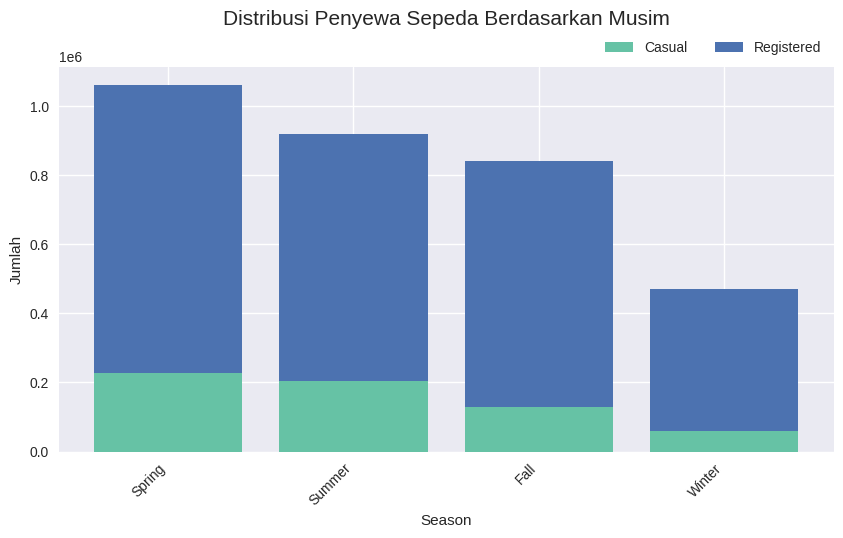

In [ ]:
# Group by season, calculate sums, and reset index
season_df = (
    days_df.groupby("season", observed=False)
    .agg({"casual": "sum", "registered": "sum"})
    .reset_index()
)

# Sort data by sum of 'casual' (descending)
season_df = season_df.sort_values(by="casual", ascending=False)

# Colors for the bars (consider using multiple colors)
colors = ['#66c2a5']

# Create the stacked bar plot
plt.figure(figsize=(10, 5))
plt.bar(
    season_df["season"], season_df["casual"], label="Casual", color=colors, bottom=0
)
plt.bar(season_df["season"], season_df["registered"], label="Registered", bottom=season_df["casual"])

# Titles, labels, and legend
plt.title("Distribusi Penyewa Sepeda Berdasarkan Musim", fontsize=15, pad=30)
plt.ylabel("Jumlah")
plt.xlabel("Season")
plt.xticks(season_df["season"], labels=["Spring", "Summer", "Fall", "Winter"])
plt.legend(bbox_to_anchor=(1, 1.1), ncol=2)

# Ensure labels don't overlap with bars (optional)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

plt.show()

### Pola berdasarkan Bulan

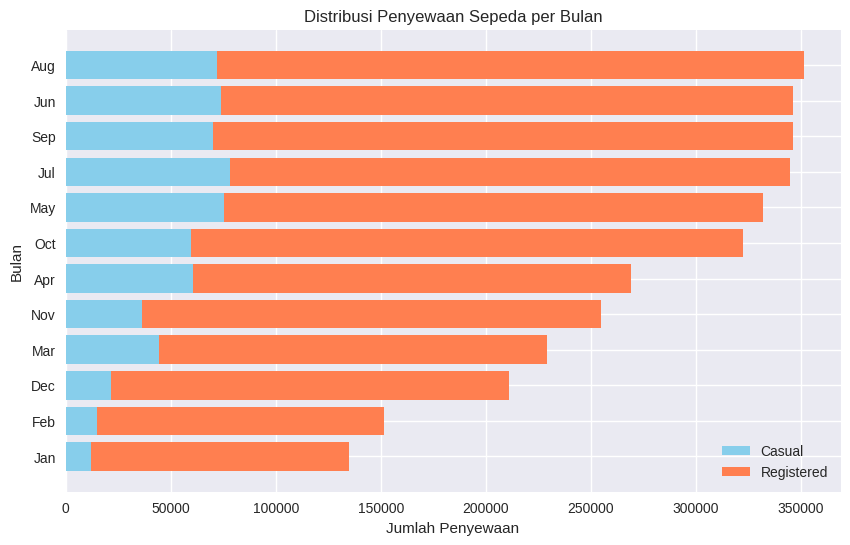

In [ ]:
# Group data by month and aggregate casual and registered counts
monthly_counts = days_df.groupby('month', observed=False).agg({'casual': 'sum', 'registered': 'sum'})

# Sort the data in descending order of total rentals
monthly_counts['total'] = monthly_counts['casual'] + monthly_counts['registered']
monthly_counts = monthly_counts.sort_values('total')

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(monthly_counts.index, monthly_counts['casual'], label='Casual', color='skyblue')
plt.barh(monthly_counts.index, monthly_counts['registered'], left=monthly_counts['casual'], label='Registered', color='coral')

plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Bulan')
plt.title('Distribusi Penyewaan Sepeda per Bulan')
plt.legend()
plt.show()


### Pola berdasarkan Hari

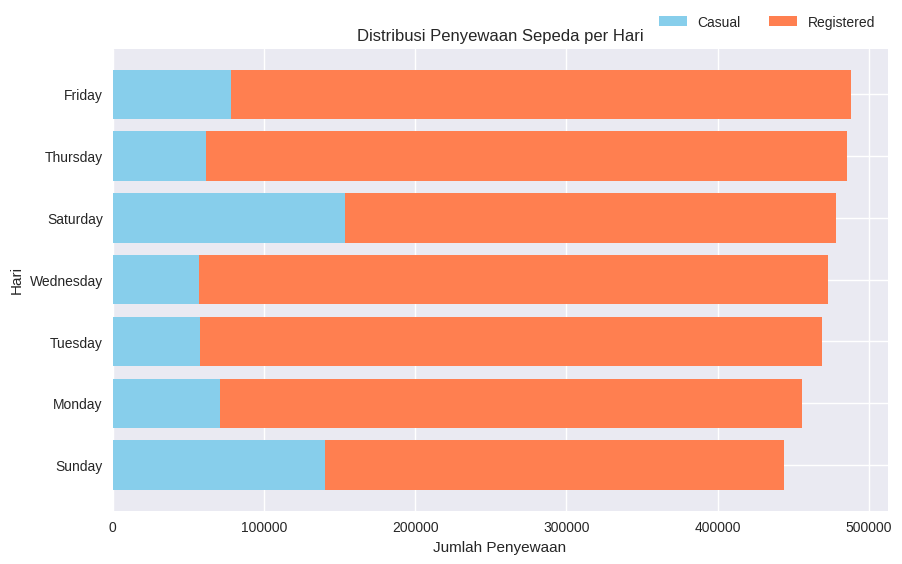

In [ ]:
# Group data by day of the week and aggregate casual and registered counts
day_of_week_counts = days_df.groupby('one_of_week', observed=False).agg({'casual': 'sum', 'registered': 'sum'})

# Sort the data in descending order of total rentals
day_of_week_counts['total'] = day_of_week_counts['casual'] + day_of_week_counts['registered']
day_of_week_counts = day_of_week_counts.sort_values('total')

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(day_of_week_counts.index, day_of_week_counts['casual'], label='Casual', color='skyblue')
plt.barh(day_of_week_counts.index, day_of_week_counts['registered'], left=day_of_week_counts['casual'], label='Registered', color='coral')

plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Hari')
plt.title('Distribusi Penyewaan Sepeda per Hari')
plt.legend(bbox_to_anchor=(1, 1.1), ncol=2)
plt.show()


### Pola berdasarkan Jam

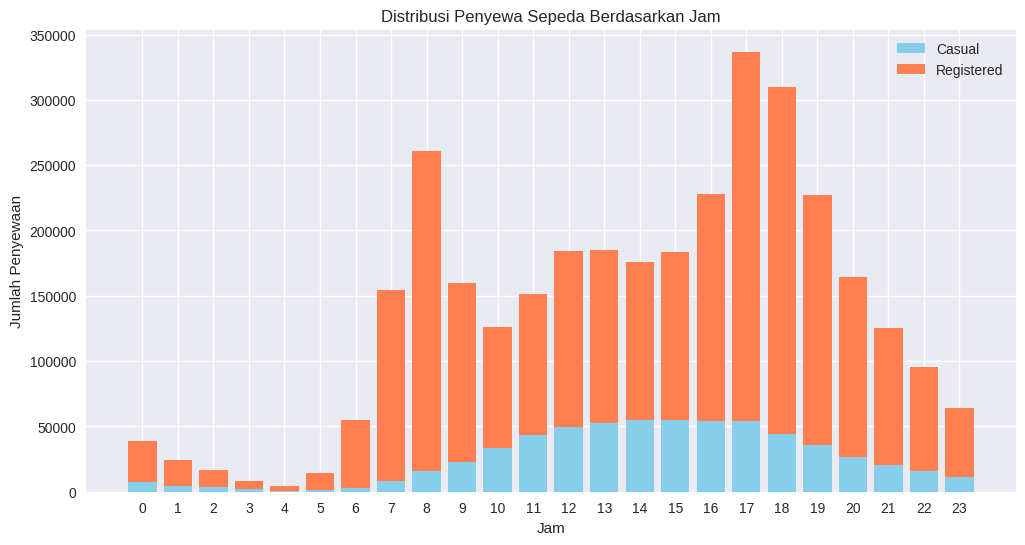

In [ ]:
# Group data by hour and aggregate casual and registered counts
hourly_counts = hours_df.groupby('hours', observed=False).agg({'casual': 'sum', 'registered': 'sum'})

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(hourly_counts.index, hourly_counts['casual'], label='Casual', color='skyblue')
plt.bar(hourly_counts.index, hourly_counts['registered'], bottom=hourly_counts['casual'], label='Registered', color='coral')

plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.title('Distribusi Penyewa Sepeda Berdasarkan Jam')
plt.xticks(hourly_counts.index)
plt.legend()
plt.show()

**Insight:**
- Terdapat dua puncak penggunaan sepeda dalam sehari, yaitu pada pagi hari (sekitar jam 8) dan sore hari (sekitar jam 17-18), yang mungkin berkaitan dengan jam berangkat dan pulang kerja.
- Penggunaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan.
- Terdapat pola musiman dalam penggunaan sepeda, dengan puncak pada bulan-bulan musim panas dan penurunan pada bulan-bulan musim dingin.

## Pertanyaan 3: Apakah faktor cuaca mempengaruhi jumlah penyewaan sepeda?

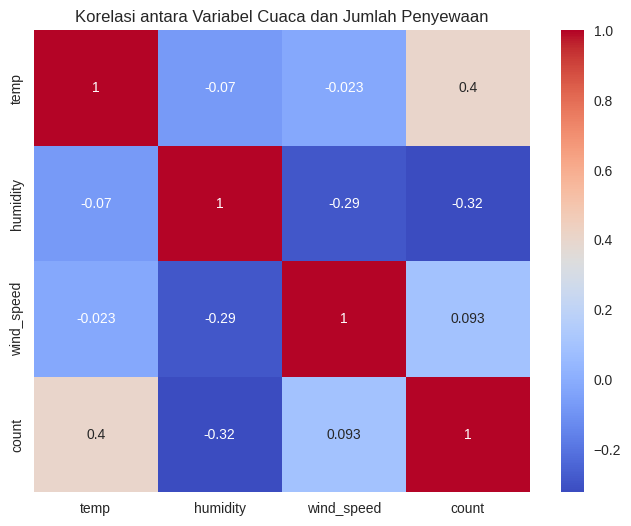

In [ ]:
# Correlation
correlation_matrix = hours_df[['temp', 'humidity', 'wind_speed', 'count']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi antara Variabel Cuaca dan Jumlah Penyewaan')
plt.show()

**Insight:**
- Temperatur (temp) memiliki korelasi positif yang kuat dengan jumlah penyewaan sepeda.
- Kelembaban memiliki korelasi negatif dengan jumlah penyewaan, menunjukkan bahwa orang cenderung kurang menyewa sepeda saat kelembaban tinggi.
- Kecepatan angin memiliki korelasi negatif yang lemah dengan jumlah penyewaan.

## Analisis Lanjutan Clustering

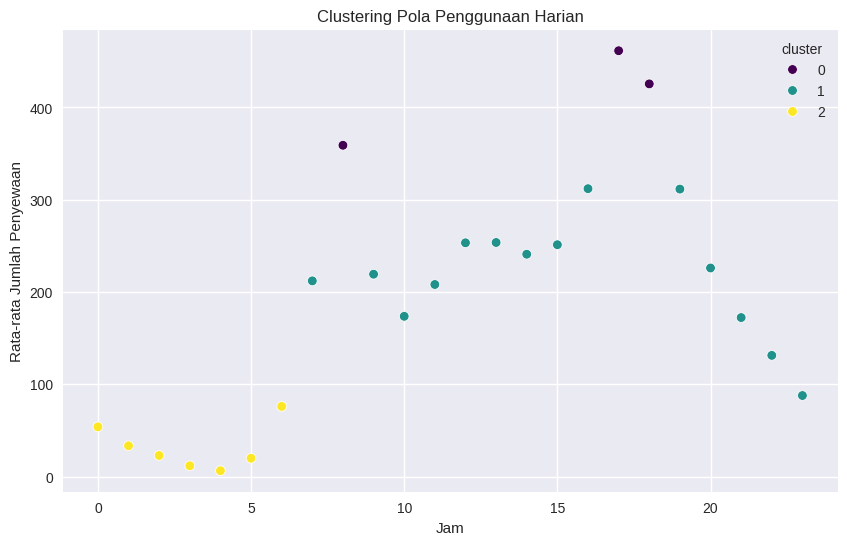

In [ ]:
# Group data by hour and calculate the average rental count
hourly_avg_rentals = hours_df.groupby('hours')['count'].mean().reset_index()

# Create a new DataFrame with hour and average rental count
clustering_data = hourly_avg_rentals[['hours', 'count']]

# Scale the data for KMeans
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data[['hours', 'count']])

# Here, we'll assume 3 clusters for demonstration
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the DataFrame
clustering_data['cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clustering_data, x='hours', y='count', hue='cluster', palette='viridis')
plt.title('Clustering Pola Penggunaan Harian')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()

In [ ]:
# Analyze the characteristics of each cluster
for cluster_num in range(3):
  cluster_data = clustering_data[clustering_data['cluster'] == cluster_num]
  print(f"Cluster {cluster_num}:")
  print(cluster_data.describe())
  print("\n")

Cluster 0:
           hours       count  cluster
count   3.000000    3.000000      3.0
mean   14.333333  415.324683      0.0
std     5.507571   51.974637      0.0
min     8.000000  359.011004      0.0
25%    12.500000  392.260997      0.0
50%    17.000000  425.510989      0.0
75%    17.500000  443.481522      0.0
max    18.000000  461.452055      0.0


Cluster 1:
           hours       count  cluster
count  14.000000   14.000000     14.0
mean   15.142857  218.097368      1.0
std     5.156880   62.286695      0.0
min     7.000000   87.831044      1.0
25%    11.250000  182.287139      1.0
50%    14.500000  222.669855      1.0
75%    19.750000  252.795250      1.0
max    23.000000  311.983562      1.0


Cluster 2:
          hours      count  cluster
count  7.000000   7.000000      7.0
mean   3.000000  32.022570      2.0
std    2.160247  24.900017      0.0
min    0.000000   6.352941      2.0
25%    1.500000  15.808611      2.0
50%    3.000000  22.869930      2.0
75%    4.500000  43.636881 

**Insight:**
- Analisis clustering mengidentifikasi tiga pola penggunaan harian yang berbeda:
  1. Cluster 0 dengan dua puncak yang jelas (pagi dan sore).
  2. Cluster 1 dengan satu puncak di siang hari.
  3. Cluster 2 dengan penggunaan yang relatif rendah sepanjang hari.

- Pola-pola ini mungkin mencerminkan perbedaan antara hari kerja, akhir pekan, dan hari libur.


## Conclusion

#### Pertanyaan 1: Bagaimana Proporsi Penyewa Casual Dan Registered dalam Total Penyewaan Sepeda?

Berdasarkan visualisasi pie chart, dapat disimpulkan bahwa proporsi penyewa Registered jauh lebih besar dibandingkan dengan penyewa Casual. Hal ini menunjukkan bahwa sebagian besar pengguna sepeda adalah pengguna terdaftar yang mungkin memiliki langganan atau menggunakan sepeda untuk keperluan reguler, seperti perjalanan ke kantor.


#### Pertanyaan 2: Bagaimana pola penggunaan sepeda berdasarkan waktu (jam, hari, bulan, musim, cuaca)?

Berdasarkan hasil analisis, pola penggunaan sepeda dipengaruhi oleh berbagai faktor waktu seperti jam, hari, bulan, dan musim.
- Terdapat dua puncak penggunaan sepeda dalam sehari, yaitu pada pagi hari (sekitar jam 8) dan sore hari (sekitar jam 17-18), yang mungkin berkaitan dengan jam berangkat dan pulang kerja.
- Penggunaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan, dan juga dipengaruhi oleh musim, dengan puncak pada bulan-bulan musim panas dan penurunan pada bulan-bulan musim dingin.
- Selain itu, cuaca juga mempengaruhi pola penyewaan, dengan kondisi cuaca yang cerah dan berkabut cenderung menghasilkan lebih banyak penyewaan dibandingkan dengan kondisi hujan atau bersalju.

#### Pertanyaan 3: Apa faktor cuaca yang paling mempengaruhi jumlah penyewaan sepeda?

- Berdasarkan analisis korelasi, suhu (temp) merupakan faktor cuaca yang paling berpengaruh terhadap jumlah penyewaan sepeda, dengan korelasi positif yang kuat.
- Ini menunjukkan bahwa semakin tinggi suhu, semakin banyak orang yang menyewa sepeda.
- Kelembapan (humidity) memiliki korelasi negatif dengan jumlah penyewaan, menunjukkan bahwa orang cenderung kurang menyewa sepeda saat kelembaban tinggi.
- Kecepatan angin (wind_speed) memiliki korelasi negatif yang lemah dengan jumlah penyewaan.

#### Analisis Clustering

Analisis clustering mengidentifikasi tiga pola penggunaan harian yang berbeda:
1. Cluster 0 dengan dua puncak yang jelas (pagi dan sore), yang mungkin mewakili hari kerja dengan pola perjalanan berangkat dan pulang kerja.
2. Cluster 1 dengan satu puncak di siang hari, yang mungkin mewakili akhir pekan atau hari libur dengan pola penggunaan yang berbeda.
3. Cluster 2 dengan penggunaan yang relatif rendah sepanjang hari, yang mungkin mewakili hari dengan kondisi cuaca buruk atau faktor lainnya yang mengurangi minat untuk menyewa sepeda.
